<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
#Завантажуємо Датасет
from keras.datasets import fashion_mnist

Параметри

In [15]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 28*28 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


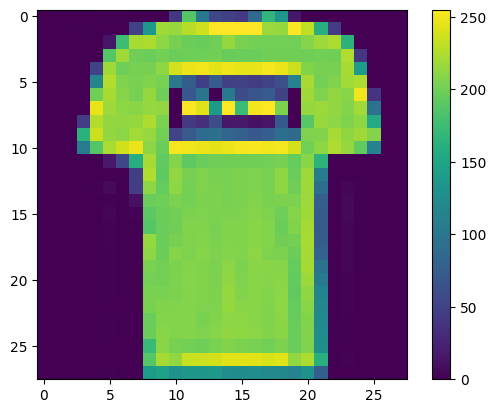

In [9]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)


# ДЗ-9

In [10]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

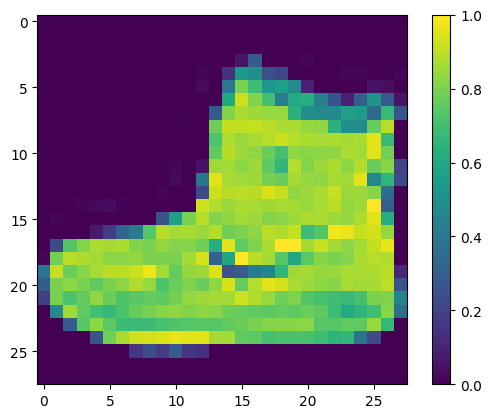

In [12]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

Подивимось датасет частково

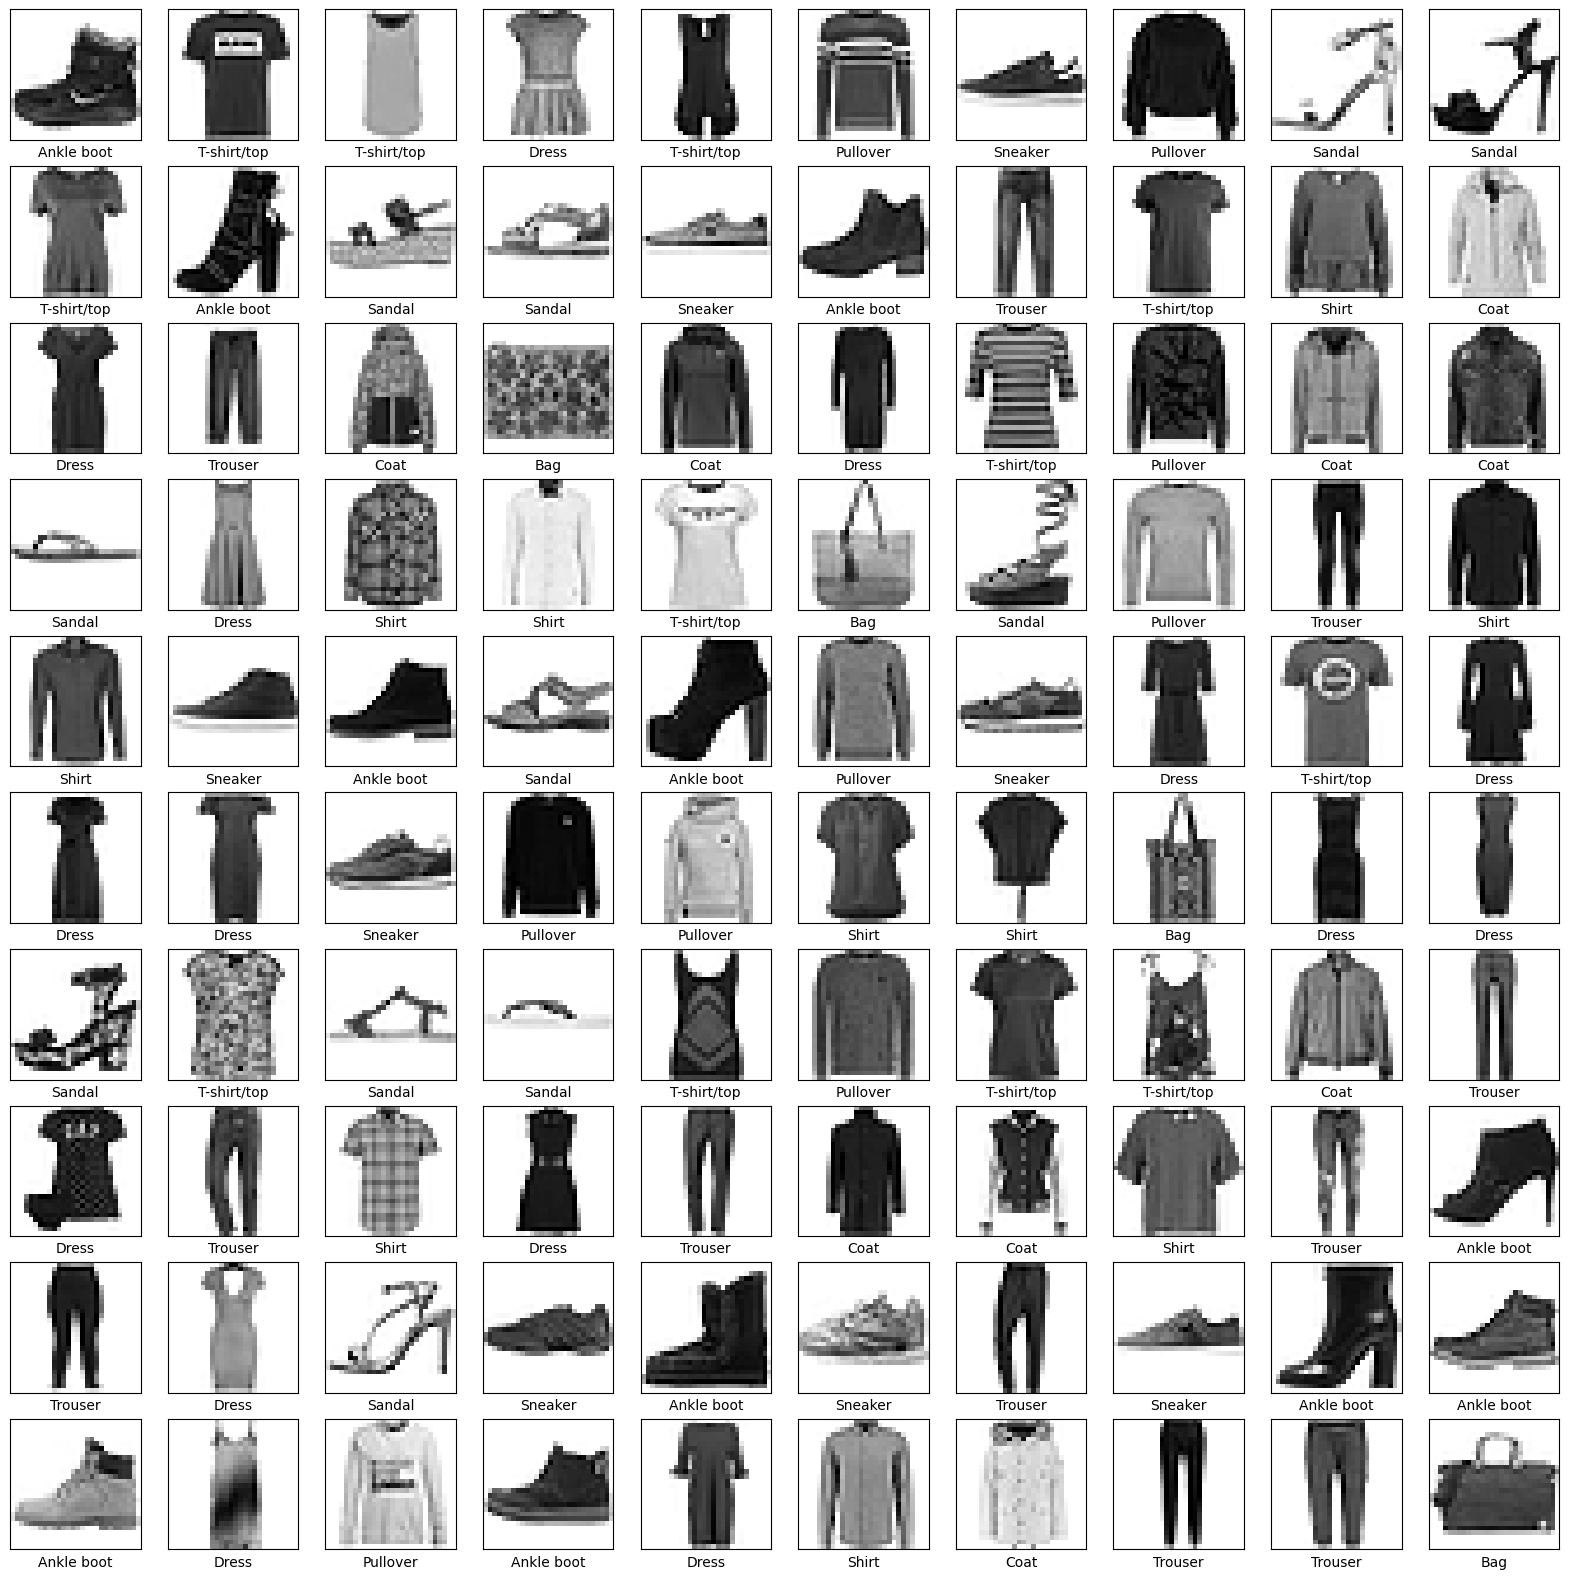

In [13]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [ ]:
Копиляція моделі

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 11s 5ms/step - loss: 0.4986 - accuracy: 0.8198 - val_loss: 0.4055 - val_accuracy: 0.8527
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3702 - accuracy: 0.8639 - val_loss: 0.3661 - val_accuracy: 0.8666
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3340 - accuracy: 0.8751 - val_loss: 0.3445 - val_accuracy: 0.8751
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3106 - accuracy: 0.8847 - val_loss: 0.3290 - val_accuracy: 0.8779
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2930 - accuracy: 0.8907 - val_loss: 0.3431 - val_accuracy: 0.8789
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2764 - accuracy: 0.8962 - val_loss: 0.3455 - val_accuracy: 0.8804
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2610 - accuracy: 0.9021 - val_loss: 0.3333 - val_accuracy

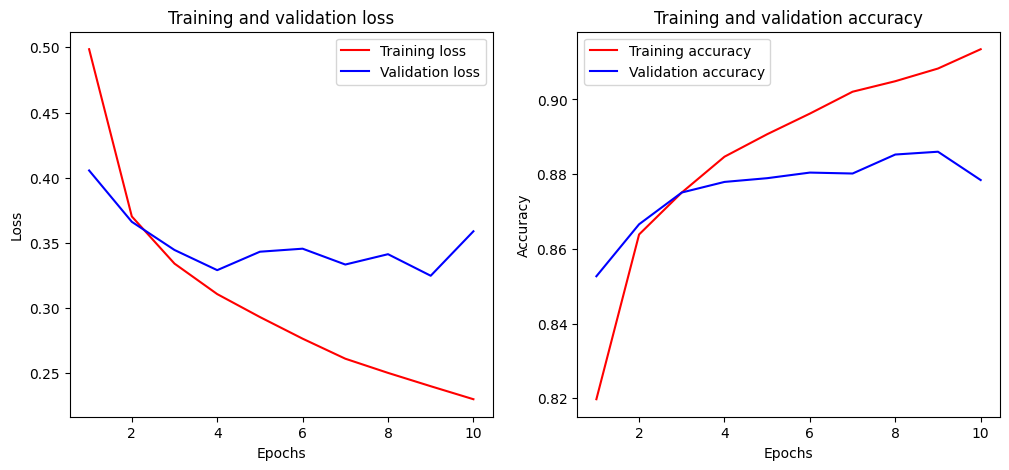

In [19]:
history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=10, validation_split=0.2)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [20]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8729
Test accuracy: 0.8729000091552734
Test loss: 0.3768370449542999


1/1 [==============================] - 0s 97ms/step
[[2.6830251e-06 7.8532281e-07 3.6921510e-06 7.9536655e-08 7.6426652e-08
  4.4219452e-04 4.4794615e-06 4.7143335e-03 7.4046750e-07 9.9483103e-01]]
Цифра, що розпізнана: 9


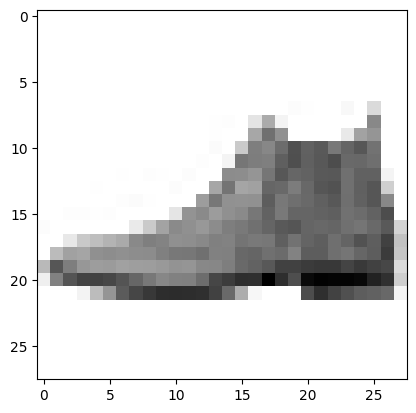

In [21]:
n=0
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Цифра, що розпізнана: {np.argmax(res)}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [22]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 3s 2ms/step


In [23]:
predictions[1]

array([9.9873000e-01, 9.8536010e-16, 1.9784623e-06, 1.9416417e-07,
       2.0226594e-09, 3.7289886e-11, 1.2677606e-03, 2.0450751e-15,
       9.6229125e-10, 1.2440711e-11], dtype=float32)

In [24]:
np.argmax(predictions[1])

0

In [25]:
y_train_1[1]

0

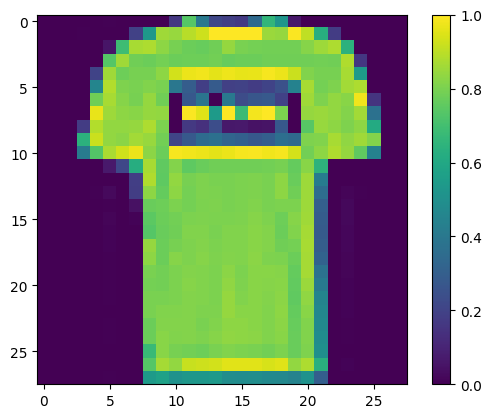

In [26]:
plt.figure()
plt.imshow(x_train_1[1])
plt.colorbar()
plt.grid(False)

In [27]:
class_names[np.argmax(predictions[1])]

'T-shirt/top'

In [28]:
predictions_all=model.predict(x_test_1)
predictions_all=np.argmax(predictions_all,axis=1)
print(predictions_all.shape)
print(predictions_all[:20])
print(y_test_1[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [29]:
mask=predictions_all==y_test_1
print(mask[:10])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(1271, 28, 28)


In [30]:
len(x_false)

1271

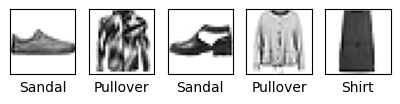

In [32]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [33]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 256 помилкових класифікацій
Trouser: 42 помилкових класифікацій
Pullover: 262 помилкових класифікацій
Dress: 74 помилкових класифікацій
Coat: 240 помилкових класифікацій
Sandal: 55 помилкових класифікацій
Shirt: 248 помилкових класифікацій
Sneaker: 27 помилкових класифікацій
Bag: 20 помилкових класифікацій
Ankle boot: 47 помилкових класифікацій


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[744   1  17  43   3   1 169   0  22   0]
 [  2 958   0  30   6   0   3   0   1   0]
 [ 13   0 738  14 112   0 112   0  11   0]
 [ 14   5  17 926   9   0  22   0   7   0]
 [  0   0  71  61 760   0  96   0  12   0]
 [  0   0   0   1   0 945   0  35   2  17]
 [ 66   0  54  36  57   0 752   0  35   0]
 [  0   0   0   0   0   8   0 973   0  19]
 [  3   0   1   4   2   1   2   7 980   0]
 [  0   0   0   1   0   7   1  38   0 953]]


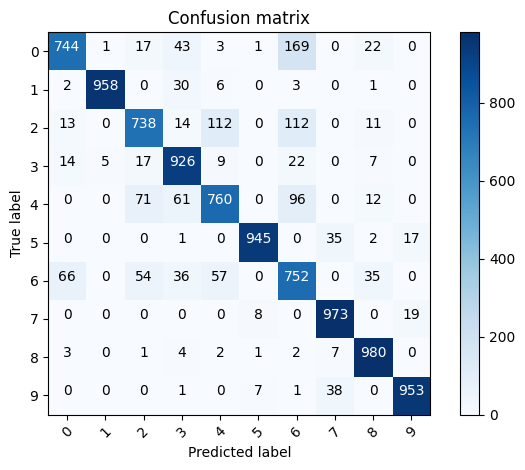

In [35]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))